In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'tae2on'
os.environ['KAGGLE_KEY'] = "9981c48232904c20395765abf76b4152"

In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!Kaggle ~)
!kaggle datasets download -d teertha/personal-loan-modeling

personal-loan-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Linux 명령어로 압축 해제하기 
!tar -xf personal-loan-modeling.zip

In [8]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BCE1-4BD5

 C:\Users\admin\파이썬_머신러닝_완벽가이드 디렉터리

2023-08-02  오후 02:30    <DIR>          .
2023-08-02  오후 02:30    <DIR>          ..
2023-08-02  오후 01:58    <DIR>          .ipynb_checkpoints
2023-07-26  오전 11:35            21,539 1. 넘파이.ipynb
2023-07-28  오후 01:05           164,621 2. 사이킷런으로 시작하는 머신러닝.ipynb
2023-07-28  오후 05:40           220,861 3.  평가.ipynb
2023-08-01  오후 05:46           736,054 4.  분류.ipynb
2023-08-02  오후 01:01           443,867 5. 회귀.ipynb
2020-03-10  오후 01:20           211,884 Bank_Personal_Loan_Modelling.csv
2019-09-20  오전 12:04       150,828,752 creditcard.csv
2019-09-20  오전 12:05        69,155,672 creditcardfraud.zip
2020-03-10  오후 01:20            62,016 personal-loan-modeling.zip
2023-08-01  오후 01:44             6,400 tree.dot
2023-08-02  오후 01:09         1,777,884 [실습] 개인 대출 모델링.ipynb
2023-08-01  오전 10:40           174,780 [실습] 캐글 신용카드 사기 검출.ipynb
2023-08-02  오후 02:30           235,058 [황태언] 수요예측.ipynb
              13개 파일     

In [9]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('./Bank_Personal_Loan_Modelling.csv')

In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
# DataFrame에서 제공하는 메소드를 이용하여 칼럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
df['Personal Loan'] = df['Personal Loan'].map({0: 'NO', 1: 'Yes'})

<Axes: xlabel='Personal Loan', ylabel='count'>

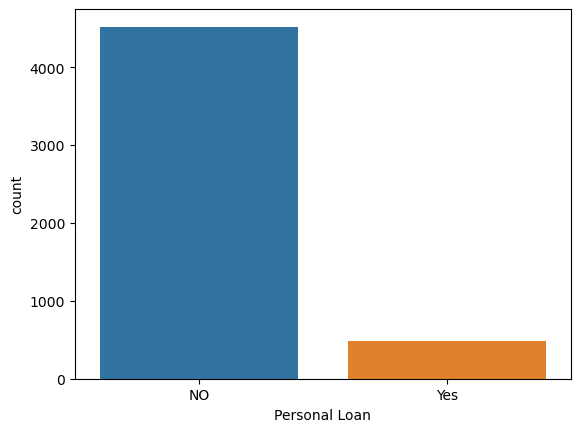

In [16]:
sns.countplot(x='Personal Loan', data=df)

<Axes: xlabel='Family', ylabel='count'>

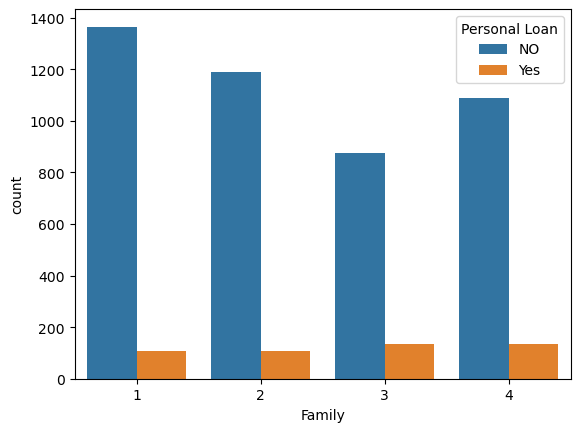

In [17]:
sns.countplot(x='Family', data=df, hue='Personal Loan')

<Axes: xlabel='Education', ylabel='count'>

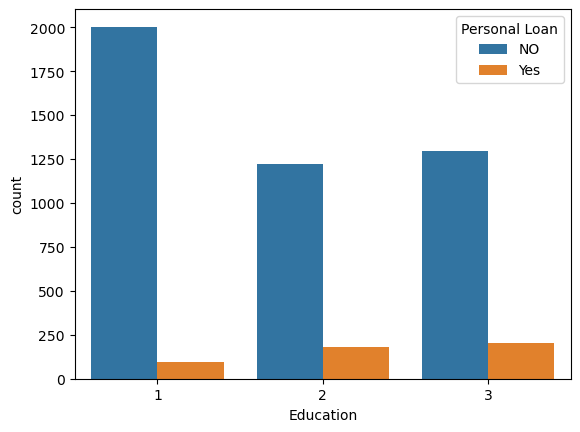

In [18]:
sns.countplot(x='Education', data=df, hue='Personal Loan')

<Axes: xlabel='Securities Account', ylabel='count'>

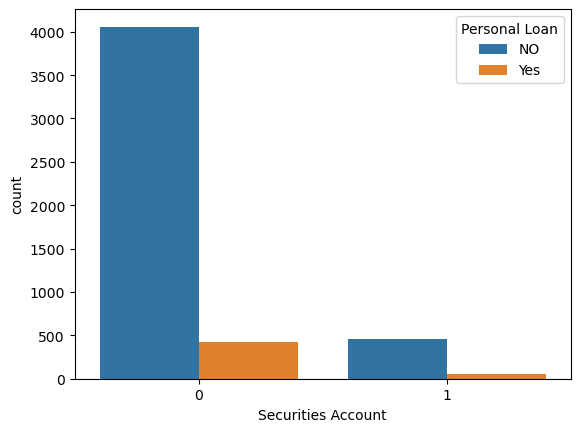

In [19]:
sns.countplot(x='Securities Account', data=df, hue='Personal Loan')

<Axes: xlabel='CD Account', ylabel='count'>

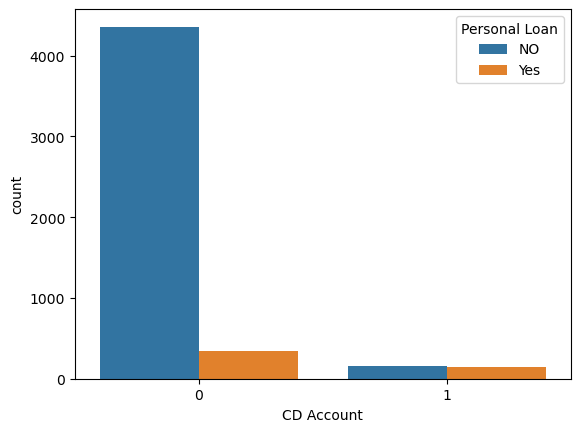

In [20]:
sns.countplot(x='CD Account', data=df, hue='Personal Loan')

In [21]:
df.groupby(['CD Account', 'Personal Loan']).count()['ID']

CD Account  Personal Loan
0           NO               4358
            Yes               340
1           NO                162
            Yes               140
Name: ID, dtype: int64

In [22]:
df.groupby(['Securities Account', 'Personal Loan']).count()['ID']

Securities Account  Personal Loan
0                   NO               4058
                    Yes               420
1                   NO                462
                    Yes                60
Name: ID, dtype: int64

<Axes: xlabel='Online', ylabel='count'>

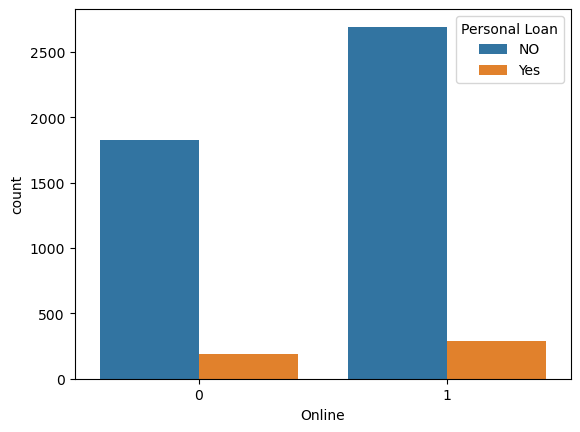

In [23]:
sns.countplot(x='Online', data=df, hue='Personal Loan')

In [24]:
df.groupby(['Online', 'Personal Loan']).count()['ID']

Online  Personal Loan
0       NO               1827
        Yes               189
1       NO               2693
        Yes               291
Name: ID, dtype: int64

<Axes: xlabel='CreditCard', ylabel='count'>

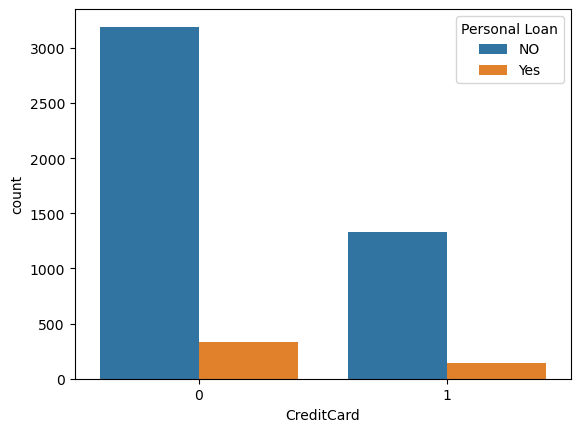

In [25]:
sns.countplot(x='CreditCard', data=df, hue='Personal Loan')

In [26]:
df.groupby(['CreditCard', 'Personal Loan']).count()['ID']

CreditCard  Personal Loan
0           NO               3193
            Yes               337
1           NO               1327
            Yes               143
Name: ID, dtype: int64

In [27]:
df.groupby(['Education']).mean()['Income']

Education
1    85.586355
2    64.313614
3    66.122585
Name: Income, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

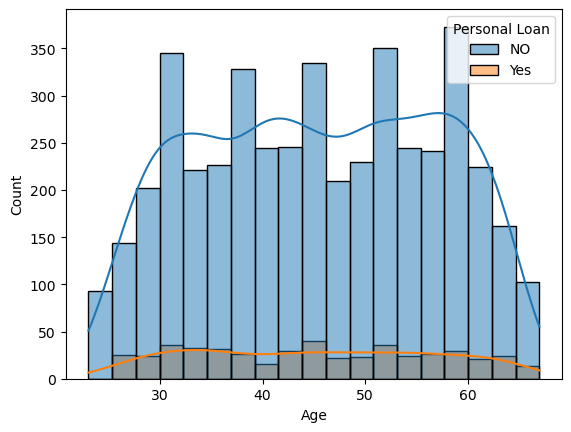

In [28]:
sns.histplot(x='Age', data=df, hue='Personal Loan', kde='True')

<Axes: xlabel='Experience', ylabel='Count'>

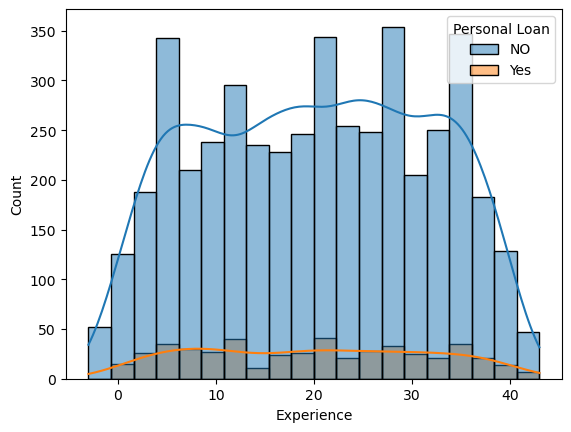

In [29]:
sns.histplot(x='Experience', data=df, hue='Personal Loan', kde='True')

<Axes: xlabel='Income', ylabel='Count'>

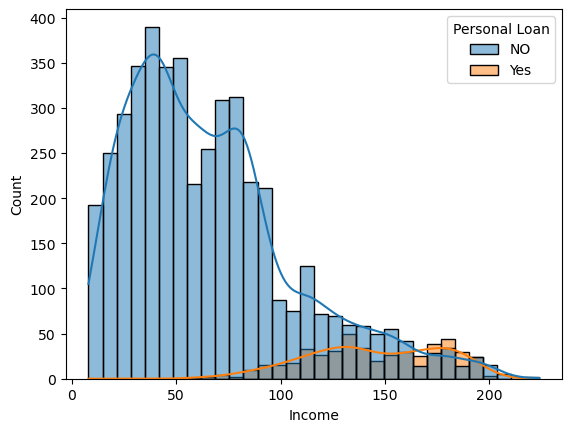

In [28]:
sns.histplot(x='Income', data=df, hue='Personal Loan', kde='True')

<Axes: xlabel='CCAvg', ylabel='Count'>

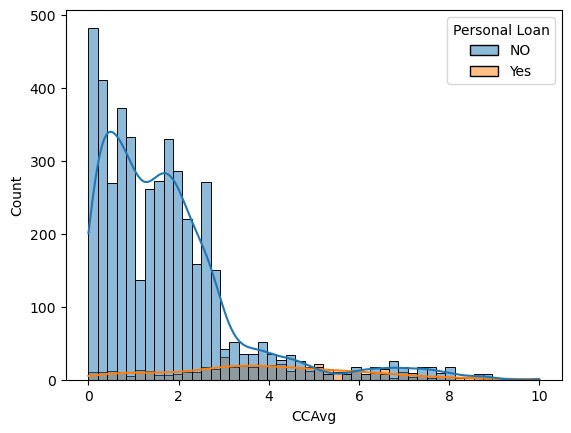

In [29]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan', kde='True')

In [30]:
print(df['CCAvg'].quantile(0.95))
print(df['CCAvg'].quantile(0.05))

6.0
0.1


In [31]:
# quantile(), drop() 등 메소를 이용하여 outlier 제거하고 통계 재분석하기 
CC1 = df['CCAvg'].quantile(0.95) 
CC2 = df['CCAvg'].quantile(0.05)
df = df[(df['CCAvg'] < CC1) & (df['CCAvg'] > CC2)]

<Axes: xlabel='CCAvg', ylabel='Count'>

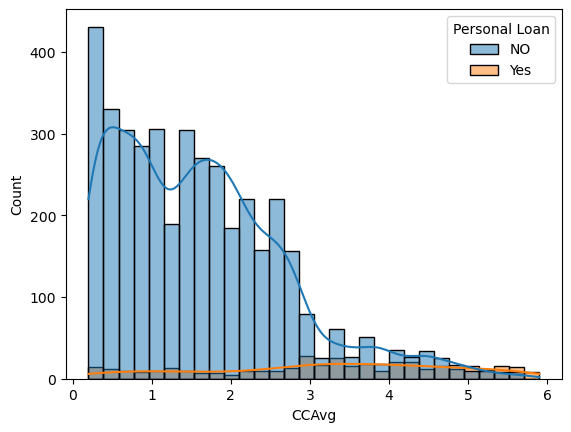

In [32]:
sns.histplot(x='CCAvg', data=df, hue='Personal Loan', kde='True')

<Axes: xlabel='Mortgage', ylabel='Count'>

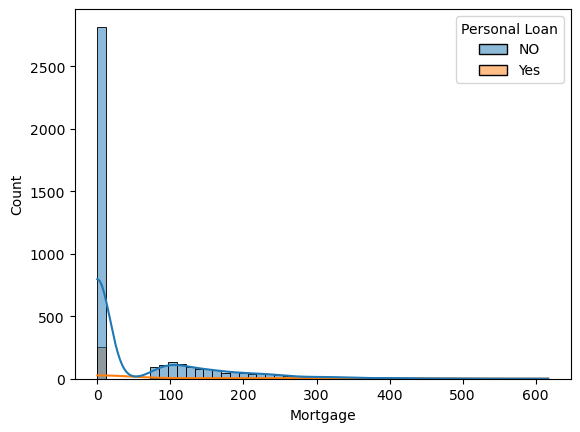

In [33]:
sns.histplot(x='Mortgage', data=df, hue='Personal Loan', kde='True')

In [34]:
print(df['Mortgage'].quantile(0.95))

260.0


In [35]:
Mor1 = df['Mortgage'].quantile(0.95)
df = df[(df['Mortgage'] < Mor1)]

<Axes: xlabel='Mortgage', ylabel='Count'>

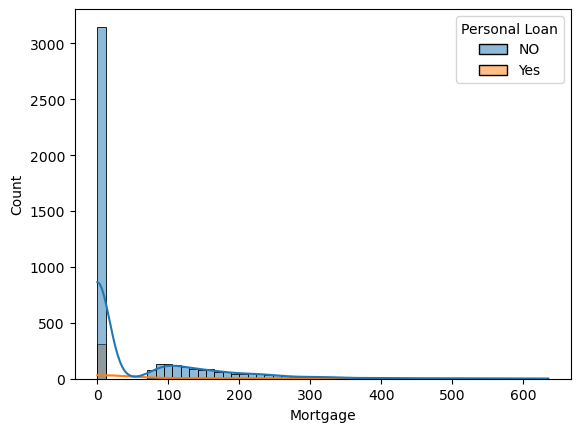

In [30]:
sns.histplot(x= 'Mortgage', data=df, hue='Personal Loan', kde='True')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4220 non-null   int64  
 1   Age                 4220 non-null   int64  
 2   Experience          4220 non-null   int64  
 3   Income              4220 non-null   int64  
 4   ZIP Code            4220 non-null   int64  
 5   Family              4220 non-null   int64  
 6   CCAvg               4220 non-null   float64
 7   Education           4220 non-null   int64  
 8   Mortgage            4220 non-null   int64  
 9   Personal Loan       4220 non-null   object 
 10  Securities Account  4220 non-null   int64  
 11  CD Account          4220 non-null   int64  
 12  Online              4220 non-null   int64  
 13  CreditCard          4220 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 494.5+ KB


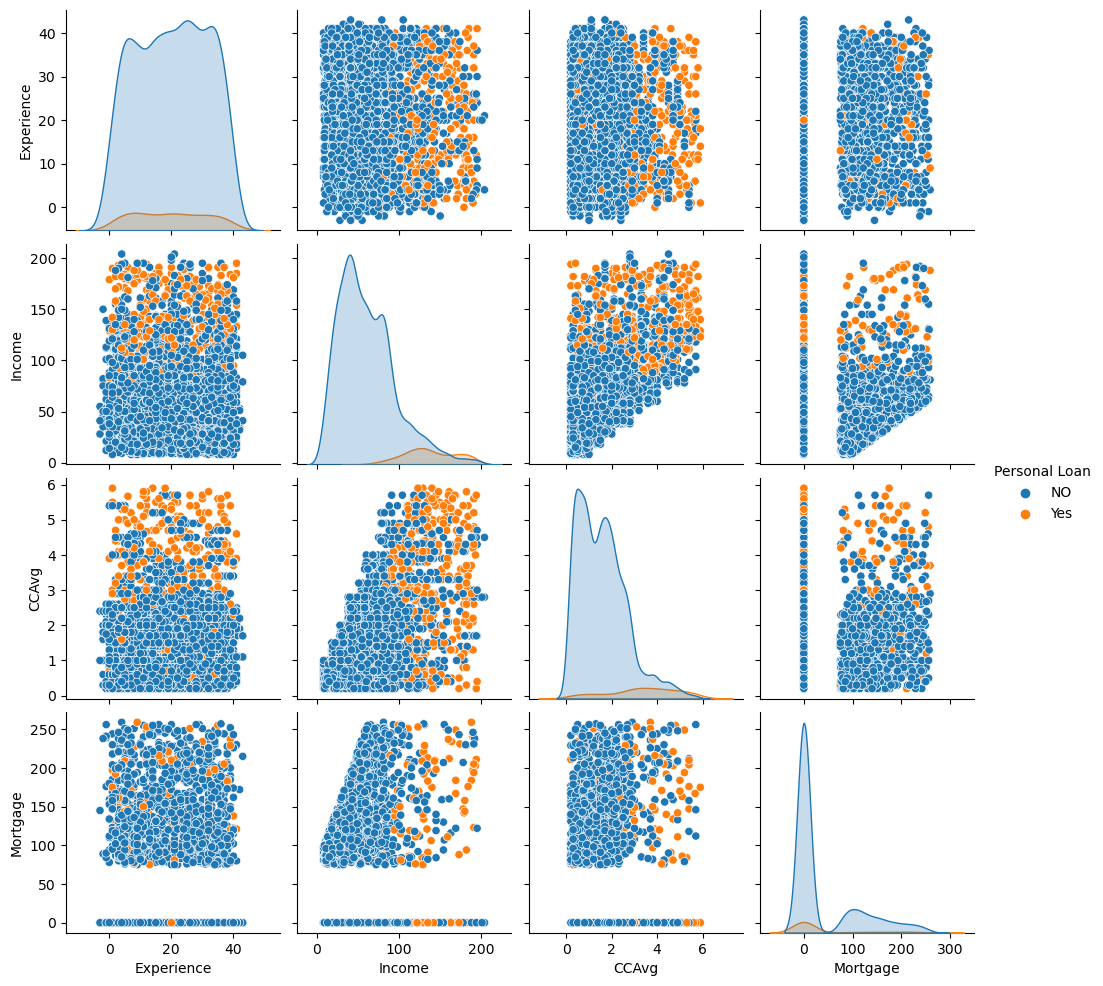

In [38]:
sns.pairplot(df, x_vars=['Experience', 'Income', 'CCAvg', 'Mortgage'],
             y_vars=['Experience', 'Income', 'CCAvg', 'Mortgage'], hue='Personal Loan')

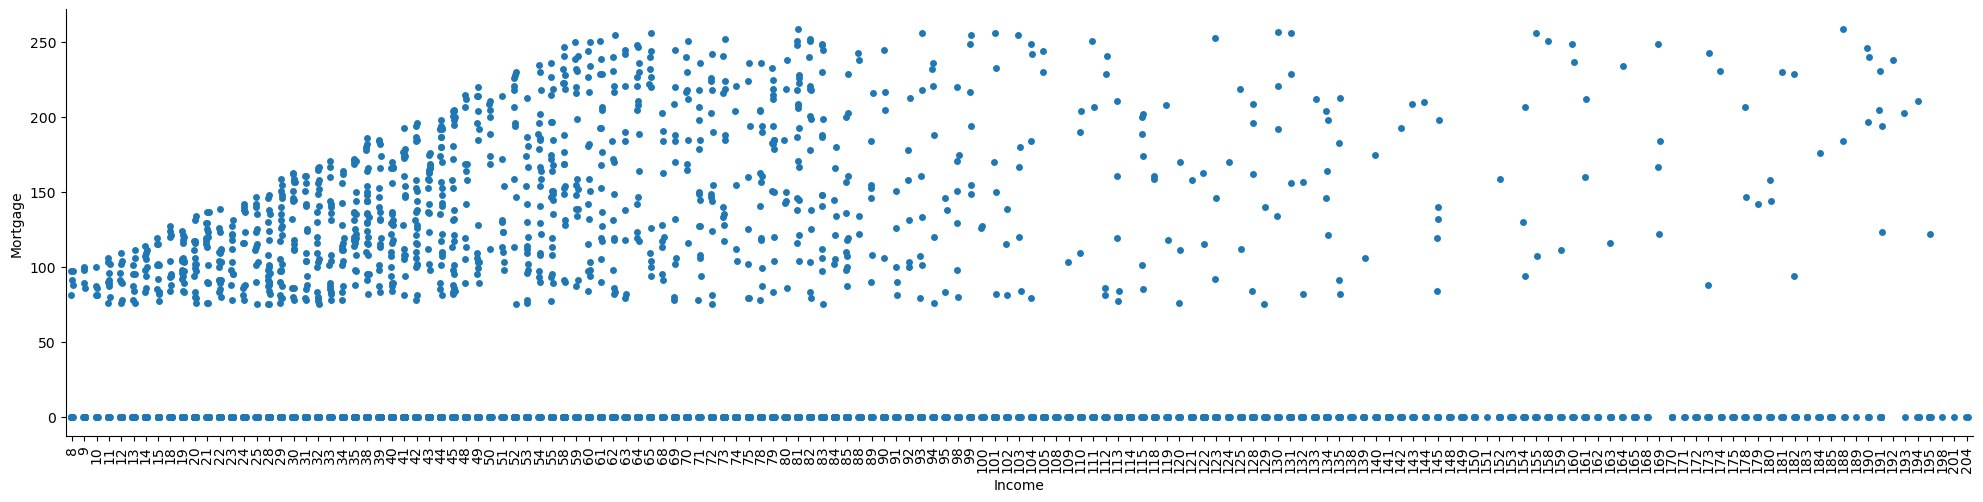

In [39]:
sns.catplot(x='Income', y='Mortgage', data=df, aspect=4)   # 너비를 인치 단위
plt.xticks(rotation=90)
plt.show()

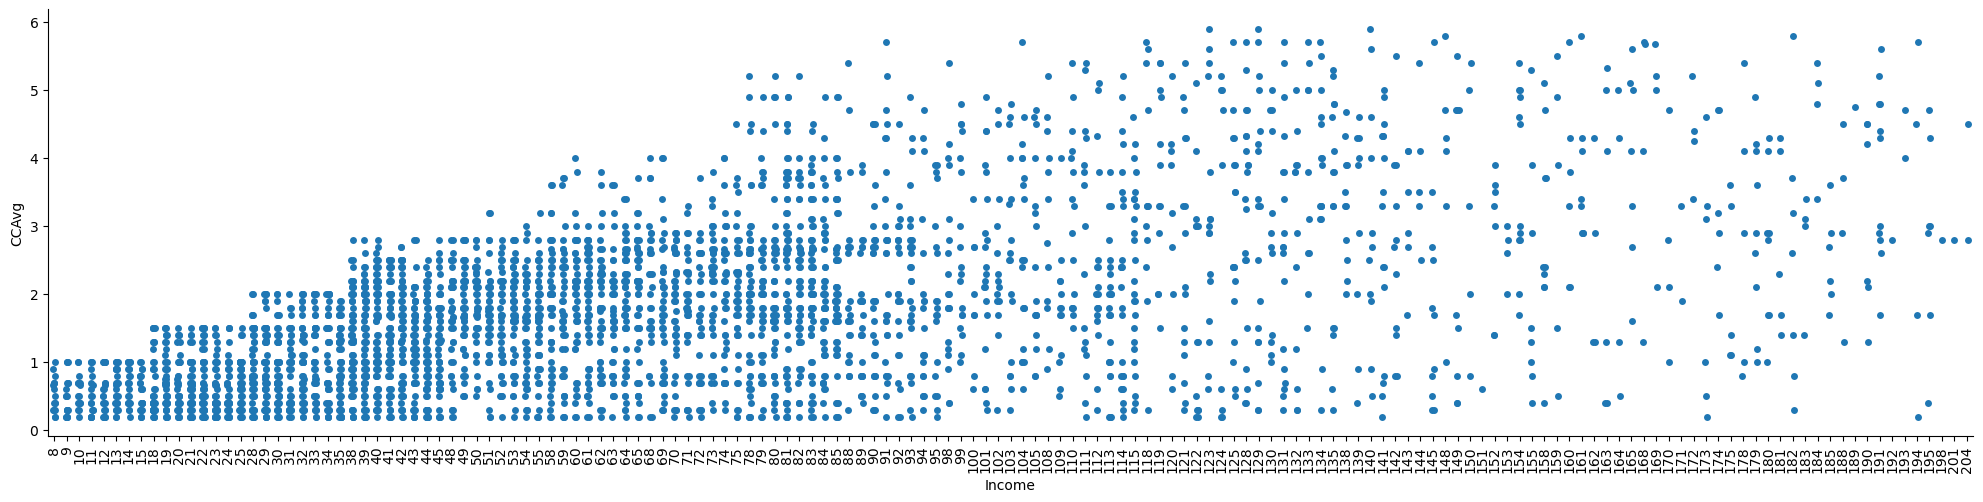

In [40]:
sns.catplot(x='Income', y='CCAvg', data=df, aspect=4)   # 너비를 인치 단위
plt.xticks(rotation=90)
plt.show()

<Axes: >

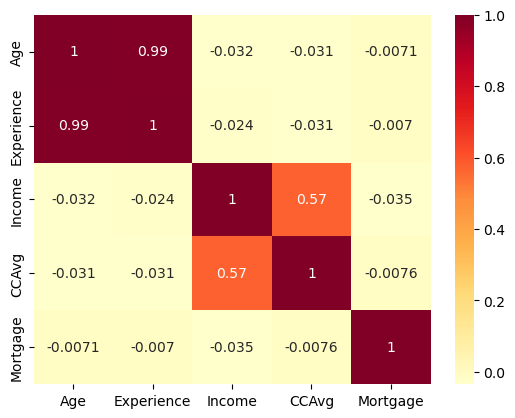

In [41]:
sns.heatmap(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].corr(), annot=True, cmap='YlOrRd')

In [42]:
dict(NO = 0, Yes = 1)

{'NO': 0, 'Yes': 1}

In [43]:
df['Personal Loan'] = df['Personal Loan'].map({'NO': 0, 'Yes': 1})
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [44]:
df.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)

In [45]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [46]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [47]:
X_cat = df['Education']
X_cat = pd.get_dummies(X_cat, prefix='Education')
X_cat.head()

,Education_1,Education_2,Education_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,Age,Income,Family,CCAvg,Mortgage
0,-1.776899,-0.443698,1.342131,-0.094657,-0.56668
1,-0.035003,-0.815310,0.480979,-0.177246,-0.56668
2,-0.557572,-1.385116,-1.241323,-0.590192,-0.56668
3,-0.905951,0.819784,-1.241323,0.813825,-0.56668
4,-0.905951,-0.542795,1.342131,-0.590192,-0.56668


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
cat_list = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
X = pd.concat([X_scaled, X_cat, df[cat_list]], axis=1)
y = df['Personal Loan']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4220 non-null   float64
 1   Income              4220 non-null   float64
 2   Family              4220 non-null   float64
 3   CCAvg               4220 non-null   float64
 4   Mortgage            4220 non-null   float64
 5   Education_1         4220 non-null   uint8  
 6   Education_2         4220 non-null   uint8  
 7   Education_3         4220 non-null   uint8  
 8   Securities Account  4220 non-null   int64  
 9   CD Account          4220 non-null   int64  
 10  Online              4220 non-null   int64  
 11  CreditCard          4220 non-null   int64  
dtypes: float64(5), int64(4), uint8(3)
memory usage: 342.1 KB


In [52]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
print(X_train.shape)
print(X_test.shape)

(2954, 12)
(1266, 12)


## 의사결정나무 

In [54]:
# 의사결정나무 - 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [62]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
dt_matrix = metrics.confusion_matrix(y_test, pred)
dt_matrix

array([[1157,    6],
       [  12,   91]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1163
           1       0.94      0.88      0.91       103

    accuracy                           0.99      1266
   macro avg       0.96      0.94      0.95      1266
weighted avg       0.99      0.99      0.99      1266



In [65]:
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('\nDecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.9858

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## GridSearchCV()을 활용한 파라미터 튜닝

In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5,
                       verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.9797
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [67]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','split0_test_score','split1_test_score',
               'split2_test_score','split3_test_score','split4_test_score',
              'mean_test_score','rank_test_score']]

,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,6,0.967851,0.981387,0.974619,0.988156,0.983051,0.979013,2
1,8,0.969543,0.984772,0.972927,0.988156,0.983051,0.979690,1
2,10,0.971235,0.983080,0.971235,0.986464,0.983051,0.979013,2
3,12,0.971235,0.983080,0.972927,0.986464,0.981356,0.979012,4
4,16,0.971235,0.983080,0.972927,0.986464,0.981356,0.979012,4
5,20,0.971235,0.983080,0.972927,0.986464,0.981356,0.979012,4
6,24,0.971235,0.983080,0.972927,0.986464,0.981356,0.979012,4


In [68]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.9794
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [69]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9842


In [70]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','param_min_samples_split','split0_test_score','split1_test_score',
               'split2_test_score','split3_test_score','split4_test_score',
              'mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,8,16,0.969543,0.981387,0.978003,0.984772,0.983051,0.979351,1
1,8,24,0.966159,0.978003,0.979695,0.984772,0.976271,0.976980,5
2,12,16,0.969543,0.981387,0.978003,0.984772,0.983051,0.979351,1
3,12,24,0.966159,0.978003,0.979695,0.984772,0.976271,0.976980,5
4,16,16,0.969543,0.981387,0.978003,0.984772,0.983051,0.979351,1
5,16,24,0.966159,0.978003,0.979695,0.984772,0.976271,0.976980,5
6,20,16,0.969543,0.981387,0.978003,0.984772,0.983051,0.979351,1
7,20,24,0.966159,0.978003,0.979695,0.984772,0.976271,0.976980,5


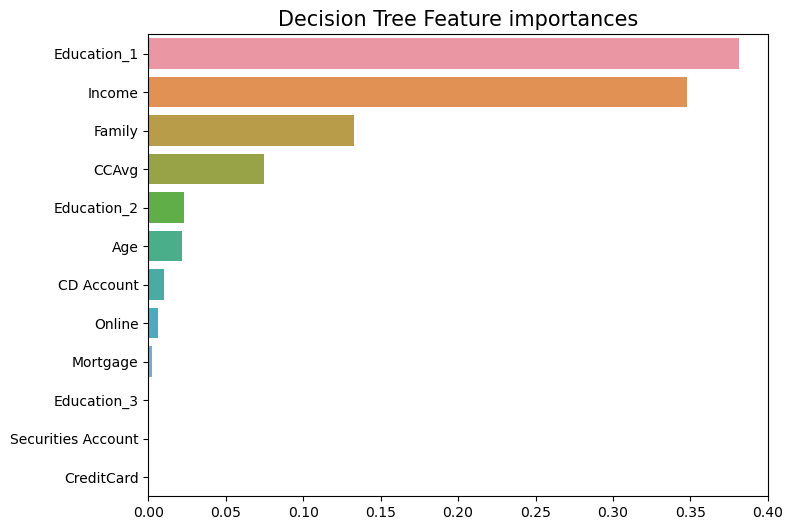

In [71]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Decision Tree Feature importances', size = 15)
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

In [72]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_cv.best_estimator_

In [73]:
df['Personal Loan yes or no'] = df['Personal Loan'].map({0:'NO', 1:'Yes'})
idx = df['Personal Loan yes or no'].value_counts().index

In [74]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(estimator, out_file="tree.dot",
                class_names= idx ,
                feature_names = ftr_importances.index,
                impurity=True,
                filled=True)

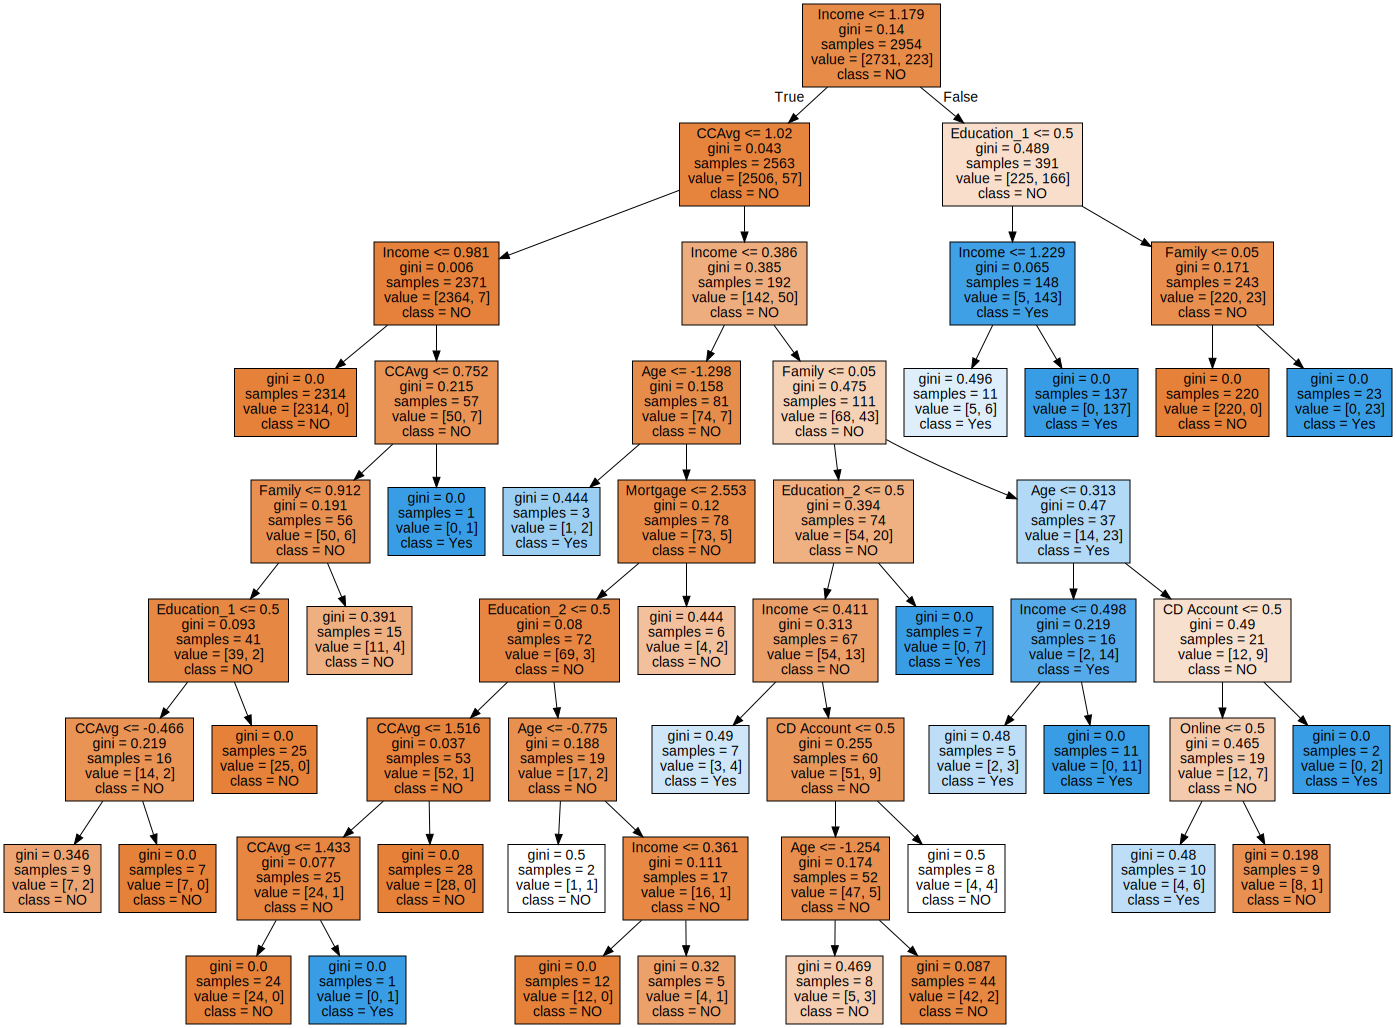

In [75]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest Classifier 모델

In [79]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9787


In [80]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 ) #  n_jobs=-1: 사용가능한 CPU 코어 모두 사용
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9780


In [81]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','param_min_samples_split','split0_test_score',
              'mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_split,split0_test_score,mean_test_score,rank_test_score
0,6,8,0.976980,0.976980,10
1,6,16,0.976980,0.976980,10
2,6,20,0.976980,0.977319,7
3,6,8,0.974949,0.975626,22
4,6,16,0.974949,0.975626,22
5,6,20,0.974949,0.975626,22
6,6,8,0.964116,0.965471,34
7,6,16,0.964116,0.965471,34
8,6,20,0.964116,0.965471,34
9,8,8,0.977657,0.977996,1


In [82]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_cv.best_estimator_
print(estimator)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=0)


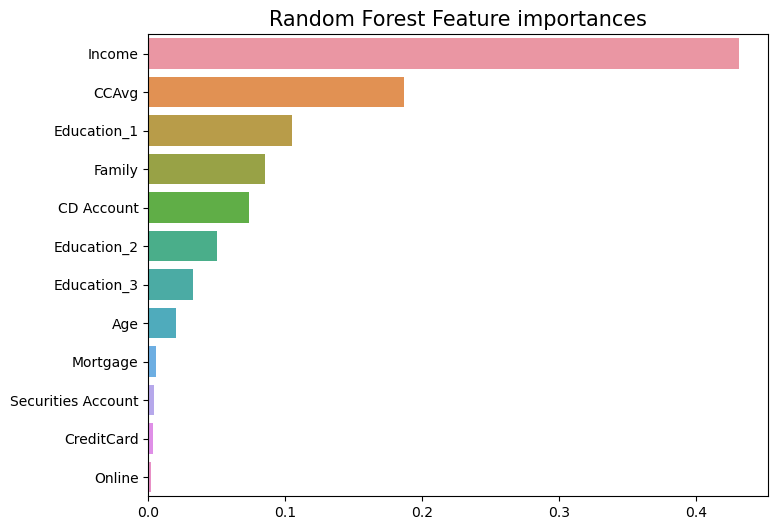

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Random Forest Feature importances',  size = 15)
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

In [58]:
# xg - 학습

In [59]:
# LGBM - 학습 